In [19]:
import pandas as pd

In [20]:
catastici = pd.read_csv('data\catastici_1741.csv')
cadaster = pd.read_csv("data/cadaster_1808.csv")

In [21]:
cadaster['parcelCategories'] = cadaster['parcelCategories'].apply(lambda x: eval(x))

In [22]:
# cadaster['parcelCategories'] = cadaster['parcelCategories'].apply(lambda x: x[0] if x != [] else None)

italian_words = cadaster['parcelCategories'].apply(pd.Series)
italian_words = italian_words.melt()

In [23]:
italian_words['value'].unique()

array(['CASA', 'BOTTEGA', nan, 'SCUOLA', 'TEATRO', 'LOCALE', 'MAGAZZENO',
       'PIAZZA', 'ORATORIO', 'GIARDINO', 'PALAZZO', 'LOGGIA', 'LUOGO',
       'CORTO', 'SOTTOPORTICO', 'APPARTAMENTO', 'STANZA', 'CAMERA',
       'AREA', 'LOCANDA', 'CAFFE', 'ANDITO', 'CHIESA', 'CAMPANILE',
       'CASOTTO', 'CALLE', 'ATRIO', 'CASERMA', 'VOLTA', 'TERAZZA',
       'ACCESSO', 'FORNO', 'ORTO', 'ORTAGLIA', 'FABBRICA', 'MONASTERO',
       'SPAZIO', 'CONVENTO', 'SCALLA', 'OSPIZIO', 'CASETTA', 'CASINO',
       'SAGRESTIA', 'STRADA', 'CASALE', 'SINAGOGA', 'PORTICO', 'PRATO',
       'FORNACE', 'MACELLO', 'CANTIERE', 'INGRESSO', 'RIPOSTIGLIO',
       'LATRINE', 'CARCERE', 'ARCHIVIO', 'PASCOLO', 'FONDAMENTA',
       'CAVANA', 'SCUDERIA', 'RAFFINARIA', 'ZECCA', 'CAPELLA', 'CIMITERO',
       'SQUERO', 'TAGLIAPIETRA', 'OSTERIA', 'OFFICINA', 'UFFICI',
       'VENDIVINO', 'TINTORIA', 'STALLA', 'TORRE'], dtype=object)

In [24]:
cadaster['parcelCategory'] = cadaster['parcelCategories'].apply(lambda x: x[0] if x != [] else None)

In [25]:
catastici['entryCategories'] = catastici['entryCategories'].apply(lambda x: eval(x))

In [26]:
catastici['entryCategories'] = catastici['entryCategories'].apply(lambda x: x[0] if x != [] else None)

In [27]:
catastici['entryCategories'].unique()

array(['housing', 'storage', 'shop', None, 'hospitality',
       'administration', 'healthcare', 'entertainment', 'transport',
       'palace', 'guild', 'religious'], dtype=object)

In [28]:
translations = [
    ['CASA','housing',False], 
    ['BOTTEGA','shop',False], 
    ['SCUOLA','religious',True], 
    ['TEATRO','entertainment',False],
    ['LOCALE','shop',True],
    ['MAGAZZENO','storage', False],
    ['PIAZZA','None', True],
    ['ORATORIO','religious',False],
    ['GIARDINO','None',False],
    ['PALAZZO','palace',False],
    ['LOGGIA','guild',True],
    ['LUOGO','None', True],
    ['CORTO','None',True],
    ['SOTTOPORTICO','None',True],
    ['APPARTAMENTO','housing',False],
    ['STANZA','housing',False],
    ['CAMERA','housing',False],
    ['AREA','None', True],
    ['LOCANDA','hospitality',False],
    ['CAFFE','shop',False],
    ['ANDITO','None',True],
    ['CHIESA','relgious',False],
    ['CAMPANILE','religious',True],
    ['CASOTTO','housing',False],
    ['CALLE','None',True],
    ['ATRIO','None',True],
    ['CASERMA','administration',True],
    ['VOLTA','administration',True],
    ['TERAZZA','None',True],
    ['ACCESSO','None',True],
    ['FORNO','shop',False],
    ['ORTO','None',True],
    ['ORTAGLIA','None',True],
    ['FABRICA','shop',True],
    ['MONASTERO','religious',False],
    ['SPAZIO','None',True],
    ['CONVENT','religious',False],
    ['SCALLA','None',True],
    ['OSPIZIO','healthcare',False],
    ['CASETTA','housing',False],
    ['CASINO','entertainment',False],
    ['UFFICI','administration',True]
]

In [29]:
translations = pd.DataFrame(translations,columns = ['italian','english','help'])

In [30]:
merged_cata = catastici.merge(translations, right_on = 'english', left_on = 'entryCategories')
merged_cada = cadaster.merge(translations, right_on = 'italian', left_on = 'parcelCategory')

In [31]:
cata = merged_cata[['cadaster1808Correspondance','cadaster1808ClosestParcel','italian','english','entryOwnerText']]
cata.columns = ['cadaster1808Correspondance','cadaster1808ClosestParcel','italian','english','1748Owner']

In [32]:
cada = merged_cada[['parcelOwnerText','english','area','bounds','parcelNumber','subParcelNumber']]
cada.columns = ['1808Owner','english','area','bounds','parcelNumber','subParcelNumber']

In [33]:
cada2 = cada[cada['english'] != "None"]
total_area_cada = cada2['area'].sum()
prop_cada = cada2.groupby("english")['area'].sum()/total_area_cada

In [34]:
cata['cadaster1808ClosestParcel'] = cata['cadaster1808ClosestParcel'].astype(str)

cata2 = cata.merge(cada, left_on = 'cadaster1808ClosestParcel',right_on = 'parcelNumber')

<ipython-input-34-8a1042b4481e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cata['cadaster1808ClosestParcel'] = cata['cadaster1808ClosestParcel'].astype(str)


In [35]:
total_area = cata2['area'].sum()
prop_cata = cata2.groupby('english_x')['area'].sum().sort_values() / total_area

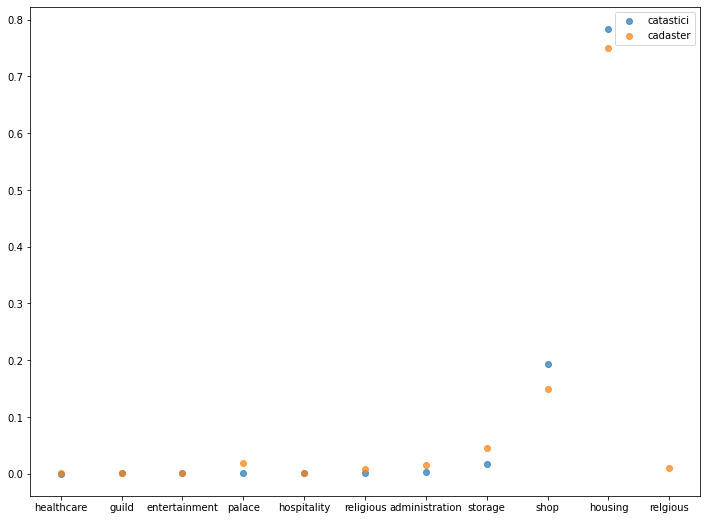

In [36]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (12,9))

ax.scatter(prop_cata.index, prop_cata.values, label = 'catastici', alpha = 0.7)
ax.scatter(prop_cada.index, prop_cada.values, label = 'cadaster', alpha = 0.7)
plt.legend()

In [37]:
prop_cata

english_x
healthcare        0.000088
guild             0.000220
entertainment     0.000265
palace            0.000394
hospitality       0.000752
religious         0.001199
administration    0.002743
storage           0.016769
shop              0.193650
housing           0.783920
Name: area, dtype: float64

In [38]:
cada2

,1808Owner,english,area,bounds,parcelNumber,subParcelNumber
0,PAGANI - Concorso de' creditori,housing,608.117,"[[12.334122, 45.433708], [12.3348277, 45.43387...",1,NaN
1,TIEPOLO Gerolamo q. Almorò,housing,540.546,"[[12.334480899999999, 45.4337119], [12.3348348...",2,1
2,PAGANI - Concorso come sopra al N° 1 [de' cred...,housing,540.546,"[[12.334480899999999, 45.4337119], [12.3348348...",2,2
3,TIEPOLO Lorenzo q. Almorò,housing,107.721,"[[12.3342139, 45.4336528], [12.3343629, 45.433...",4,NaN
4,ZEN Antonio q. Sebastiano,housing,700.702,"[[12.3341915, 45.4334627], [12.3345998, 45.433...",5,NaN
...,...,...,...,...,...,...
22656,Coletti Nicolò quondam Florian,entertainment,659.809,"[[12.333348, 45.4409526], [12.3336469, 45.4411...",5261,NaN
22657,"Vigonzo Margarita, vedova di Morosini Francesc...",entertainment,297.567,"[[12.3322619, 45.4475117], [12.3324814, 45.447...",6381,NaN
22658,"Suddetto [Zen Carlo, e fratelli quondam Renier]",entertainment,594.622,"[[12.3225345, 45.4476595], [12.3228543, 45.447...",7778,NaN
22659,Suddetta,entertainment,370.837,"[[12.3208296, 45.4365489], [12.3210201, 45.436...",12583,NaN


In [24]:
cata2

,cadaster1808Correspondance,cadaster1808ClosestParcel,italian,english_x,1748Owner,1808Owner,english_y,area,bounds,parcelNumber,subParcelNumber
0,2030.0,2030,CASA,housing,Scola di Santa Maria e San Cristofolo all'orto,COMUNE DI VENEZIA provenienza come sopra [del ...,housing,167.796,"[[12.3367117, 45.4373282], [12.336926, 45.4374...",2030,2
1,2030.0,2030,CASA,housing,Scola di Santa Maria e San Cristofolo all'orto,VENIER Pietro Gerolamo q. Giovanni Battista,shop,167.796,"[[12.3367117, 45.4373282], [12.336926, 45.4374...",2030,1
2,2030.0,2030,APPARTAMENTO,housing,Scola di Santa Maria e San Cristofolo all'orto,COMUNE DI VENEZIA provenienza come sopra [del ...,housing,167.796,"[[12.3367117, 45.4373282], [12.336926, 45.4374...",2030,2
3,2030.0,2030,APPARTAMENTO,housing,Scola di Santa Maria e San Cristofolo all'orto,VENIER Pietro Gerolamo q. Giovanni Battista,shop,167.796,"[[12.3367117, 45.4373282], [12.336926, 45.4374...",2030,1
4,2030.0,2030,STANZA,housing,Scola di Santa Maria e San Cristofolo all'orto,COMUNE DI VENEZIA provenienza come sopra [del ...,housing,167.796,"[[12.3367117, 45.4373282], [12.336926, 45.4374...",2030,2
...,...,...,...,...,...,...,...,...,...,...,...
58525,7331.0,7331,MONASTERO,religious,NaN,Valier Zaccaria quondam Ottaviano,housing,113.351,"[[12.3269708, 45.4449978], [12.3271238, 45.445...",7331,2
58526,7331.0,7331,MONASTERO,religious,NaN,Grimani Almorò quondam Marc'Antonio,housing,113.351,"[[12.3269708, 45.4449978], [12.3271238, 45.445...",7331,3
58527,7331.0,7331,CONVENT,religious,NaN,Valier Zaccaria quondam ottaviano,storage,113.351,"[[12.3269708, 45.4449978], [12.3271238, 45.445...",7331,1
58528,7331.0,7331,CONVENT,religious,NaN,Valier Zaccaria quondam Ottaviano,housing,113.351,"[[12.3269708, 45.4449978], [12.3271238, 45.445...",7331,2


In [ ]:
schema = {
    'geometry':'Polygon',
    'properties':[('Name','str')]
}
#open a fiona object
polyShp = fiona.open('../ShapeOut/cropPoly.shp', mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326")
#get list of points
xyList = []
rowName = ''
for index, row in polyDf.iterrows():
    xyList.append((row.X,row.Y))
    rowName = row.Name
xyList[:5]
[(-84.20239642444, 9.48033431305493),
 (-84.2021899231741, 9.48055508704213),
 (-84.2018864783201, 9.48079161161365),
 (-84.2015288437831, 9.48115260231102),
 (-84.2013071850694, 9.4813034753504)]
#save record and close shapefile
rowDict = {
'geometry' : {'type':'Polygon',
                 'coordinates': [xyList]}, #Here the xyList is in brackets
'properties': {'Name' : rowName},
}
polyShp.write(rowDict)
#close fiona object
polyShp.close()